### CHARACTER-LEVEL RNN

Classifying Laptops and Monitors using their product name. 

-------------------------

### 1. DataSet

In [1]:
## importing libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import MultiLabelBinarizer
import string

In [2]:
laptop = pd.read_csv("laptop1.csv")
laptop.head()

,ProdName,Brand,Model,Processor,RAM,OS,Disk,Dim,Category
0,Lenovo Ideapad 130 Core i3 7th Gen - (4 GB/1 T...,Lenovo,Ideapad,Intel Core i3 Processor (7th Gen),4 GB DDR4,64 bit Windows 10,1 TB HDD,39.62 cm (15.6 inch),Laptop
1,Lenovo Ideapad 130 Core i3 7th Gen - (4 GB/1 T...,Lenovo,Ideapad,Intel Core i3 Processor (7th Gen),4 GB DDR4,64 bit Windows 10,1 TB HDD,39.62 cm (15.6 inch),Laptop
2,HP 14q Core i3 7th Gen - (8 GB/256 GB SSD/Wind...,HP,EliteBook,Intel Core i3 Processor (7th Gen),8 GB DDR4,64 bit Windows 10,256 GB SSD,35.56 cm (14 inch),Laptop
3,Dell Vostro 3000 Core i3 8th Gen - (4 GB/1 TB ...,Dell,Vostro,Intel Core i3 Processor (8th Gen),4 GB DDR4,Linux/Ubuntu,1 TB HDD,35.56 cm (14 inch),Laptop
4,HP 14q Core i5 8th Gen - (8 GB/1 TB HDD/Window...,HP,Zbook,Intel Core i5 Processor (8th Gen),8 GB DDR4,64 bit Windows 10,1 TB HDD,35.56 cm (14 inch),Laptop


In [3]:
monitor = pd.read_csv("monitor1.csv")
monitor.head()

,ProdName,Brand,DisplayType,Dim,RespTime,HDMI,Category
0,Lenovo 27 inch Full HD Monitor (D27-20),Lenovo,LED,68.58 cm (27 inch) Full HD,4 ms,HDMI,Monitor
1,HP 23.8 inch Full HD LED Backlit IPS Panel Mon...,HP,LED,60.45 cm (23.8 inch) Full HD,5 ms,HDMI Ports - 1,Monitor
2,HP 21.5 inch Full HD LED Backlit IPS Panel Mon...,HP,LED Backlit,54.61 cm (21.5 inch) Full HD,14 ms,HDMI Ports - 1,Monitor
3,Samsung 21.5 inch Full HD LED Backlit Monitor ...,Samsung,backlit led,54.61 cm (21.5 inch) Full HD,4 ms,HDMI,Monitor
4,LG 18.5 inch HD LED Backlit Monitor (19M38HB -...,LG,LED Backlit,46.99 cm (18.5 inch) HD,5 ms,HDMI Ports - 1,Monitor


In [4]:
monitor = monitor.sample(416, replace = True)
monitor.shape

(416, 7)

In [5]:
# Combining the laptop and monitor names
df = laptop[['ProdName','Category']]
df = df.append(monitor[['ProdName','Category']], ignore_index = True).reset_index(drop= True) 

In [6]:
# Computing List of characters and their len and storing in new columns
df['charList'] = df['ProdName'].apply(lambda x: list(x))
df['len'] = df['ProdName'].apply(len)

In [7]:
df.head()

,ProdName,Category,charList,len
0,Lenovo Ideapad 130 Core i3 7th Gen - (4 GB/1 T...,Laptop,"[L, e, n, o, v, o, , I, d, e, a, p, a, d, , ...",85
1,Lenovo Ideapad 130 Core i3 7th Gen - (4 GB/1 T...,Laptop,"[L, e, n, o, v, o, , I, d, e, a, p, a, d, , ...",85
2,HP 14q Core i3 7th Gen - (8 GB/256 GB SSD/Wind...,Laptop,"[H, P, , 1, 4, q, , C, o, r, e, , i, 3, , ...",93
3,Dell Vostro 3000 Core i3 8th Gen - (4 GB/1 TB ...,Laptop,"[D, e, l, l, , V, o, s, t, r, o, , 3, 0, 0, ...",68
4,HP 14q Core i5 8th Gen - (8 GB/1 TB HDD/Window...,Laptop,"[H, P, , 1, 4, q, , C, o, r, e, , i, 5, , ...",91


In [8]:
df.tail()

,ProdName,Category,charList,len
827,Lenovo 23.8 inch Full HD Monitor (Q24i-10),Monitor,"[L, e, n, o, v, o, , 2, 3, ., 8, , i, n, c, ...",42
828,MarQ by Flipkart 23.8 inch Full HD LED Backlit...,Monitor,"[M, a, r, Q, , b, y, , F, l, i, p, k, a, r, ...",73
829,Lenovo 27 inch Full HD Monitor (D27-20),Monitor,"[L, e, n, o, v, o, , 2, 7, , i, n, c, h, , ...",39
830,Dell 22 inch Full HD Monitor (E2218HN),Monitor,"[D, e, l, l, , 2, 2, , i, n, c, h, , F, u, ...",38
831,MarQ by Flipkart 23.8 inch Full HD LED Backlit...,Monitor,"[M, a, r, Q, , b, y, , F, l, i, p, k, a, r, ...",73


### 2. Preprocessing

In [9]:
# Extracting the list of all unique characters
mlb = MultiLabelBinarizer()
mlb.fit(df["charList"])
mlb.classes_

array([' ', '(', ')', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
       'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z'], dtype=object)

In [10]:
all_letters =  ''.join(mlb.classes_) 
n_letters = len(all_letters)

In [11]:
all_letters

' ()+-./0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

In [12]:
# functions to convert into tensor

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [13]:
# examples of the tensor conversion
print(letterToTensor('a'))
print(lineToTensor('Lenovo').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
torch.Size([6, 1, 69])


In [14]:
category_lines = {}

category_lines['Laptop'] = df.loc[df.Category == 'Laptop'].ProdName
category_lines['Monitor'] = df.ProdName.loc[df.Category == 'Monitor'].reset_index(drop = True)
category_lines

{'Laptop': 0      Lenovo Ideapad 130 Core i3 7th Gen - (4 GB/1 T...
 1      Lenovo Ideapad 130 Core i3 7th Gen - (4 GB/1 T...
 2      HP 14q Core i3 7th Gen - (8 GB/256 GB SSD/Wind...
 3      Dell Vostro 3000 Core i3 8th Gen - (4 GB/1 TB ...
 4      HP 14q Core i5 8th Gen - (8 GB/1 TB HDD/Window...
                              ...                        
 411    Lenovo Ideapad 500 Core i5 6th Gen - (4 GB/1 T...
 412    Lenovo Ideapad 330 Core i7 8th Gen - (8 GB/1 T...
 413    Lenovo Ideapad 320 APU Quad Core A6 - (4 GB/1 ...
 414    Lenovo G50-30 Pentium Quad Core 4th Gen - (4 G...
 415    Lenovo Ideapad 330 Core i3 7th Gen - (4 GB/1 T...
 Name: ProdName, Length: 416, dtype: object,
 'Monitor': 0      MarQ by Flipkart 23.8 inch Full HD LED Backlit...
 1      Philips 27 inch Full HD LED Backlit IPS Panel ...
 2      HP 21.5 inch Full HD LED Backlit IPS Panel Mon...
 3      Samsung 21.5 inch Full HD LED Backlit Monitor ...
 4      MarQ by Flipkart 23.8 inch Full HD LED Backlit...
      

### 3. Defining RNN


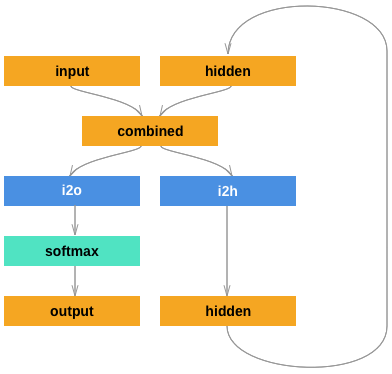

In [15]:
# defining a RNN class
class RNN(nn.Module):
    
    def __init__(self, data_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        input_size = data_size + hidden_size
        self.i2h = nn.Linear(input_size, hidden_size)
        self.i2o = nn.Linear(input_size, output_size)
        #self.softmax = nn.Softmax(dim = 1)

    def forward(self,data, hidden):
        combined = torch.cat((data, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        #output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 10

rnn = RNN(n_letters, n_hidden, 2)

#### Checking layers

In [16]:
inp = lineToTensor(df["ProdName"].loc[1])
inp.shape

torch.Size([85, 1, 69])

In [17]:
input = letterToTensor('L')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
output

tensor([[0.1651, 0.0283]], grad_fn=<AddmmBackward>)

In [18]:
input = lineToTensor('LG Monitor')
#print(input.size())
hidden = torch.zeros(1, n_hidden)
print('first input is:',input[0])
output, next_hidden = rnn(input[0], hidden)
print(output)
# for i in range(1,len(input)):
#     output, hidden = rnn(input[i], next_hidden)
#     print('input is: ', input[i])
#     print(i,' output : ',output)
#     print('hidden : ', hidden)
#     print('-----')
#     next_hidden = hidden
# print(output)


first input is: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[0.1651, 0.0283]], grad_fn=<AddmmBackward>)


In [19]:
all_categories = ['Laptop', 'Monitor']

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Laptop', 0)


In [20]:
## choose samples from the data
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(2):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)
    print(category_tensor)
    print(line_tensor.size())
    print('---')




category = Monitor / line = Samsung 21.5 inch Full HD LED Backlit Monitor (sf350 ls22f350fhwxxl)
tensor([1])
torch.Size([68, 1, 69])
---
category = Monitor / line = MarQ by Flipkart 23.8 inch Full HD LED Backlit IPS Panel Monitor (MA24MN)
tensor([1])
torch.Size([73, 1, 69])
---


#### training

In [21]:
criterion = nn.CrossEntropyLoss()

In [22]:
optimiser = torch.optim.Adam(rnn.parameters())

In [23]:
learning_rate = 0.02 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)##CHECKKK
    
    loss.backward()
    optimiser.step()
    
#     print(output, category_tensor,loss.item())
#     print('----')

    # Add parameters' gradients to their values, multiplied by learning rate
    """
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    """

    return output, loss.item()


In [24]:
import time
import math

n_iters = 10000
print_every = 100
plot_every = 10

grnd_truth =[]
pred_out =[]

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    #print(category_tensor, line_tensor.size()[0])
    grnd_truth.append(category)
    output, loss = train(category_tensor, line_tensor)
    pred_out.append(output)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

100 1% (0m 1s) 0.6004 Lenovo Ideapad 520 Core i5 8th Gen - (8 GB/2 TB HDD/Windows 10 Home/2 GB Graphics) 520-15IKB Laptop / Laptop ✓
200 2% (0m 2s) 0.5556 HP 23.8 inch Full HD LED Backlit IPS Panel Monitor (24m) / Monitor ✓
300 3% (0m 3s) 0.0762 Lenovo 27 inch Full HD Monitor (D27-20) / Monitor ✓
400 4% (0m 5s) 0.0274 HP APU Dual Core A6 - (4 GB/1 TB HDD/DOS) 245 G7 Laptop / Laptop ✓
500 5% (0m 6s) 0.0822 Avita Liber Core i7 8th Gen - (8 GB/256 GB SSD/Windows 10 Home) NS14A2IN241P Thin and Light Laptop / Laptop ✓
600 6% (0m 7s) 0.0024 HP Pavilion x360 Core i5 8th Gen - (8 GB/1 TB HDD/8 GB SSD/Windows 10 Home) 14-cd0080TU 2 in 1 Laptop / Laptop ✓
700 7% (0m 8s) 0.0345 Lenovo 27 inch Full HD Monitor (D27-20) / Monitor ✓
800 8% (0m 9s) 0.0017 LG 22 inch Full HD LED Backlit IPS Panel Monitor (22MP68VQ) / Monitor ✓
900 9% (0m 10s) 0.0054 Lenovo Core i7 8th Gen - (8 GB/1 TB HDD/Windows 10 Home/2 GB Graphics) L340-15IWL Laptop / Laptop ✓
1000 10% (0m 11s) 0.0037 HP Pavilion x360 Core i5 10th 

KeyboardInterrupt: 

In [ ]:
#pd.Series(grnd_truth).value_counts()

In [ ]:
#pred_out

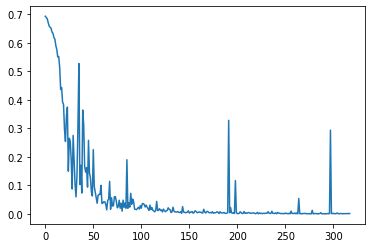

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [26]:
# Keep track of correct guesses in a confusion matrix
n_categories = 2
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output



In [ ]:
# # Go through a bunch of examples and record which are correctly guessed
# for i in range(n_confusion):
#     category, line, category_tensor, line_tensor = randomTrainingExample()
#     output = evaluate(line_tensor)
#     guess, guess_i = categoryFromOutput(output)
#     category_i = all_categories.index(category)
#     confusion[category_i][guess_i] += 1

# # Normalize by dividing every row by its sum
# for i in range(n_categories):
#     confusion[i] = confusion[i] / confusion[i].sum()

# # Set up plot
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(confusion.numpy())
# fig.colorbar(cax)

# # Set up axes
# ax.set_xticklabels([''] + all_categories, rotation=90)
# ax.set_yticklabels([''] + all_categories)

# # Force label at every tick
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# # sphinx_gallery_thumbnail_number = 2
# plt.show()

In [27]:
def predict(input_line):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        
        z = output
        print(z)
        print(torch.argmax(z))
        print('pred : ',all_categories[torch.argmax(z)])
        topv, topi = z.topk(1)
        #print('out: ',output.topk(1))
#         predictions = []
        
#         print(topv[0][0].item(),topi[0][0].item())
        

#         for i in range(2):
#             value = topv[0][i].item()
#             category_index = topi[0][i].item()
#             print('(%.2f) %s' % (value, all_categories[category_index]))
#             predictions.append([value, all_categories[category_index]])



In [29]:
predict('Monitor')


> Monitor
tensor([[ 1.5782, -1.5479]])
tensor(0)
pred :  Laptop
